<a href="https://colab.research.google.com/github/NeomiSony/HobbyRecommendation/blob/main/HobbyRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hb = pd.read_csv("Hobby.csv")

In [3]:
hb.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills,Problem Solving,Working Memory,Logical Intelligence,Adaptability,Musical Intelligence,Self Awareness,Perseverance,Interpersonal Skills,Critical Thinking,Verbal Intelligence,Analytical Thinking,Hobby
0,1,1,1,1,1,1,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,Photography
1,2,1,1,1,1,1,8,7,1,1,2,1,1,1,1,1,1,1,1,1,1,Photography
2,3,1,1,1,1,1,9,7,1,1,3,1,1,1,1,1,1,1,1,1,1,Photography
3,4,1,1,1,1,1,10,7,1,1,4,1,1,1,1,1,1,1,1,1,1,Photography
4,1,2,1,1,1,1,7,8,1,1,1,2,1,1,1,1,1,1,1,1,1,Photography


In [4]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Time Management                1000 non-null   int64 
 1   Listening Skills               1000 non-null   int64 
 2   Reading comprehension          1000 non-null   int64 
 3   Attention                      1000 non-null   int64 
 4   Linguistic Intelligence        1000 non-null   int64 
 5   Bodily kineastic intelligence  1000 non-null   int64 
 6   Spatial awareness              1000 non-null   int64 
 7   Creative thinking              1000 non-null   int64 
 8   Self Confidence                1000 non-null   int64 
 9   Communication Skills           1000 non-null   int64 
 10  Problem Solving                1000 non-null   int64 
 11  Working Memory                 1000 non-null   int64 
 12  Logical Intelligence           1000 non-null   int64 
 13  Adap

In [25]:

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [6]:
hb.shape

(1000, 22)

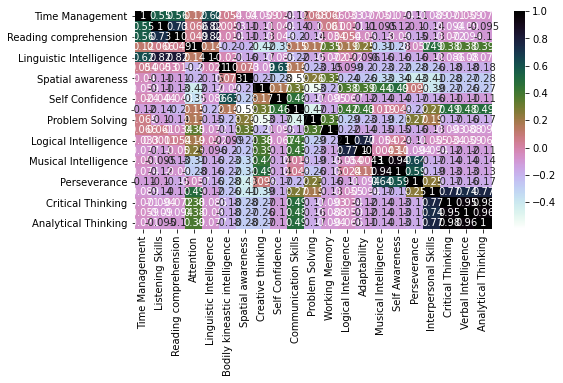

In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(hb.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [8]:
train, test = train_test_split(hb, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(700, 22)
(300, 22)


In [9]:
train_X = train[['Time Management','Listening Skills','Reading comprehension','Attention','Linguistic Intelligence','Bodily kineastic intelligence','Spatial awareness','Creative thinking','Self Confidence','Communication Skills','Problem Solving','Working Memory','Logical Intelligence','Adaptability','Musical Intelligence','Self Awareness','Perseverance','Interpersonal Skills','Critical Thinking','Verbal Intelligence','Analytical Thinking']] # taking the training data features
train_y = train.Hobby # output of the training data

test_X = test[['Time Management','Listening Skills','Reading comprehension','Attention','Linguistic Intelligence','Bodily kineastic intelligence','Spatial awareness','Creative thinking','Self Confidence','Communication Skills','Problem Solving','Working Memory','Logical Intelligence','Adaptability','Musical Intelligence','Self Awareness','Perseverance','Interpersonal Skills','Critical Thinking','Verbal Intelligence','Analytical Thinking']] # taking test data feature
test_y = test.Hobby # output value of the test data

In [10]:
train_X.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills,Problem Solving,Working Memory,Logical Intelligence,Adaptability,Musical Intelligence,Self Awareness,Perseverance,Interpersonal Skills,Critical Thinking,Verbal Intelligence,Analytical Thinking
726,3,3,2,1,1,1,1,7,1,3,3,2,1,1,9,5,9,1,1,1,1
690,3,3,2,5,2,1,1,9,1,9,1,3,8,8,3,2,2,1,1,1,1
584,1,2,2,2,1,1,7,1,1,1,5,1,2,2,2,1,1,1,1,1,1
21,2,2,2,1,1,1,8,8,1,1,2,2,2,1,1,1,1,1,1,1,1
182,3,1,2,5,2,9,7,1,1,1,3,1,2,2,1,1,1,1,1,1,1


In [11]:
test_X.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills,Problem Solving,Working Memory,Logical Intelligence,Adaptability,Musical Intelligence,Self Awareness,Perseverance,Interpersonal Skills,Critical Thinking,Verbal Intelligence,Analytical Thinking
44,1,4,3,1,1,1,7,10,1,1,1,4,3,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,8,7,1,1,2,1,1,1,1,1,1,1,1,1,1
401,2,1,1,8,1,1,6,1,1,1,5,7,1,1,1,1,1,1,1,1,1
265,2,1,1,2,1,8,1,6,10,7,2,1,1,2,1,1,1,1,1,1,1
8,1,3,1,1,1,1,7,9,1,1,1,3,1,1,1,1,1,1,1,1,1


In [12]:
train_y.head()

726                Musician
690    Computer Programming
584                 Puzzles
21              Photography
182                   Dance
Name: Hobby, dtype: object

In [13]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  1.0


In [14]:
new_input = [[2,2,3,6,2,9,9,2,2,3,1,1,1,1,1,1,1,1,1,1,1]]
# get prediction for new input
new_output = model.predict(new_input)
print(new_output)

['Dance']


In [15]:
new_input = [[2,2,3,3,2,4,7,10,2,3,2,3,1,2,3,4,1,2,1,2,2]]
# get prediction for new input
new_output = model.predict(new_input)
print(new_output)

['Photography']


In [16]:
new_input = [[2,1,3,4,2,1,3,2,2,1,4,2,1,3,8,5,9,1,8,2,4]]
# get prediction for new input
new_output = model.predict(new_input)
print(new_output)

['Musician']


In [17]:
new_input = [[2,3,1,10,3,2,9,2,3,1,6,2,1,1,2,3,1,4,3,2,4]]
# get prediction for new input
new_output = model.predict(new_input)
print(new_output)

['Sudoku']


In [21]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(train_X, train_y)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(train_X, train_y)

In [22]:
poly_pred = poly.predict(test_X)
rbf_pred = rbf.predict(test_X)

In [26]:
poly_accuracy = accuracy_score(test_y, poly_pred)
poly_f1 = f1_score(test_y, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  100.00
F1 (Polynomial Kernel):  100.00


In [29]:
new_input = [[2,3,1,10,3,2,9,2,3,1,6,2,1,1,2,3,1,4,3,2,4]]
# get prediction for new input
new_output = poly.predict(new_input)
print(new_output)

['Sudoku']


In [30]:
new_input = [[2,2,3,3,2,4,7,10,2,3,2,3,1,2,3,4,1,2,1,2,2]]
# get prediction for new input
new_output = poly.predict(new_input)
print(new_output)

['Photography']


In [28]:
rbf_accuracy = accuracy_score(test_y, rbf_pred)
rbf_f1 = f1_score(test_y, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  8.33
F1 (RBF Kernel):  1.28


In [18]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  1.0


In [19]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  1.0
